In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [74]:
dff = df.copy()

In [111]:
df.head(3)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565


In [76]:
df[ "FullDate" ] = pd.to_datetime(df[ "FullDate" ])
df.set_index( "FullDate" , inplace= True )

In [110]:
df.head(2)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635


In [78]:
df.isnull().sum()


Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

#### Date and Electricity price

Text(0, 0.5, 'ElecPrice')

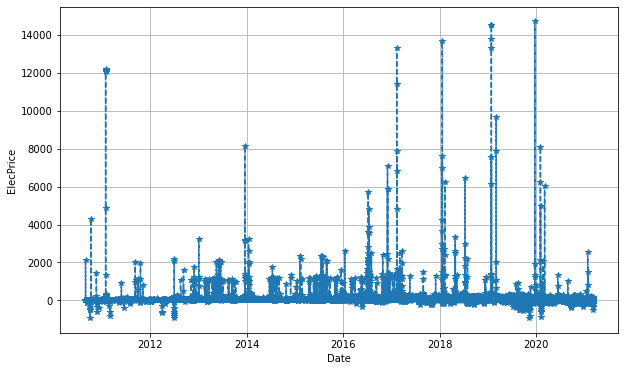

In [79]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df.index, df.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Date' )
plt.ylabel( 'ElecPrice' )

### RESAMPLED DAILY DATAFRAME

In [112]:
df_daily = df.resample( 'D' ).sum() 
df_daily.head(3)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38,88.56,2751.700
2010-09-02,369.6,38898.99,88.56,570.810
2010-09-03,439.2,41665.76,106.80,504.975


#### Date and Electricity price with resampled daily dataframe

Text(0, 0.5, 'ElecPrice')

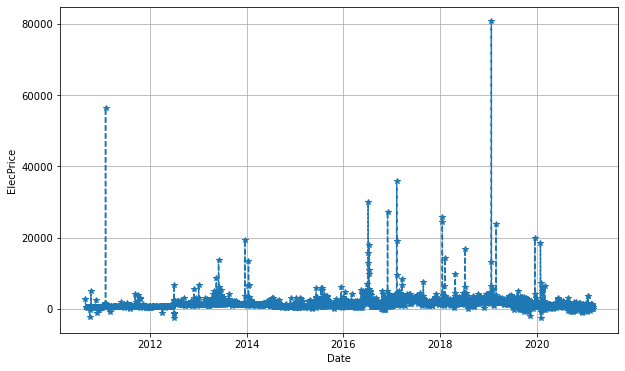

In [81]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Date' )
plt.ylabel( 'ElecPrice' )

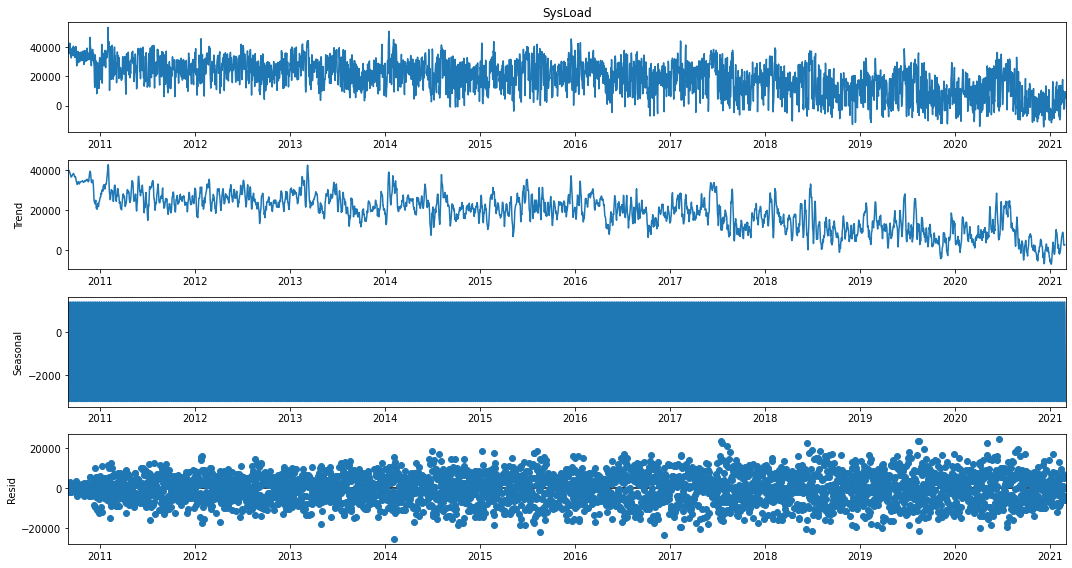

In [82]:
import statsmodels.api as sm
from pylab import rcParams
rcParams[ 'figure.figsize' ] = 15 , 8
decompose_series = sm.tsa.seasonal_decompose(df_daily[ 'SysLoad'], model= 'additive' )
decompose_series.plot()
plt.show() 


In [83]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily[ 'SysLoad' ])
print(f'ADF Statistic: {adf_result[ 0 ]}')
print(f'p-value: {adf_result[ 1 ]}')
print(f'No. of lags used: {adf_result[ 2 ]}')
print(f'No. of observations used : {adf_result[ 3 ]}')
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
    
     print(f'{k} : {v}') 

ADF Statistic: -3.690158988836649
p-value: 0.0042537255045740725
No. of lags used: 30
No. of observations used : 3803
Critical Values:
1% : -3.432070672988693
5% : -2.8623002987378547
10% : -2.567174716967499


In [84]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily[ 'GasPrice' ])
print(f'ADF Statistic: {adf_result[ 0 ]}')
print(f'p-value: {adf_result[ 1 ]}')
print(f'No. of lags used: {adf_result[ 2 ]}')
print(f'No. of observations used : {adf_result[ 3 ]}')
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
    
     print(f'{k} : {v}') 

ADF Statistic: -2.902766697165178
p-value: 0.04502721288462563
No. of lags used: 27
No. of observations used : 3806
Critical Values:
1% : -3.4320693157877544
5% : -2.8622996992165364
10% : -2.5671743978048323


### The P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places respectively are 0.004254 and 0.045027

### 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places respectively are -2.8623, -2.5672

In [85]:
x_train = df_daily[:2757]
x_test = df_daily[2757:]


In [86]:
dftrainpredict = x_train.reset_index()
dftrainpredict = dftrainpredict.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })
dftrainpredict

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
2752,2018-03-15,609.6,27139.02585,220.6272,2717.340
2753,2018-03-16,648.0,19710.46400,216.9600,2277.335
2754,2018-03-17,724.8,1079.34705,209.0400,1718.385
2755,2018-03-18,508.8,-4102.43795,203.9880,1088.015


In [87]:
from prophet import Prophet 

dftrainpredictmodel = Prophet()
dftrainpredictmodel.fit(dftrainpredict[['ds','y']])

17:40:03 - cmdstanpy - INFO - Chain [1] start processing
17:40:04 - cmdstanpy - INFO - Chain [1] done processing


In [88]:
future = dftrainpredictmodel.make_future_dataframe(periods= 1077 , freq= 'D' )
forecast = dftrainpredictmodel.predict(future)
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,849.782919,-1202.870510,3447.449304,849.782919,849.782919,143.630337,143.630337,143.630337,159.363178,159.363178,159.363178,-15.732841,-15.732841,-15.732841,0.0,0.0,0.0,993.413256
1,2010-09-02,849.736979,-1340.630081,3377.550315,849.736979,849.736979,223.924010,223.924010,223.924010,257.127937,257.127937,257.127937,-33.203926,-33.203926,-33.203926,0.0,0.0,0.0,1073.660989
2,2010-09-03,849.691039,-1551.315228,3270.082304,849.691039,849.691039,-1.135165,-1.135165,-1.135165,50.277336,50.277336,50.277336,-51.412501,-51.412501,-51.412501,0.0,0.0,0.0,848.555874
3,2010-09-04,849.645098,-1851.382874,2866.769241,849.645098,849.645098,-341.488729,-341.488729,-341.488729,-271.465795,-271.465795,-271.465795,-70.022934,-70.022934,-70.022934,0.0,0.0,0.0,508.156369
4,2010-09-05,849.599158,-2042.092728,2857.607595,849.599158,849.599158,-431.480164,-431.480164,-431.480164,-342.752089,-342.752089,-342.752089,-88.728075,-88.728075,-88.728075,0.0,0.0,0.0,418.118994


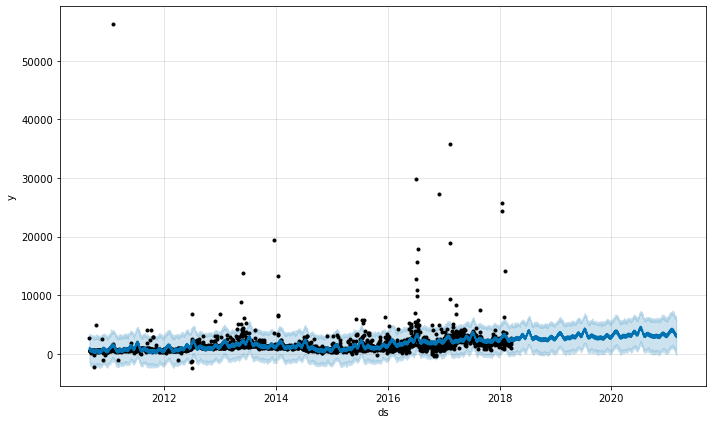

In [89]:
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries
dftrainpredictmodel.plot(forecast)
plt.show()

In [90]:
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [91]:
dftestpredict = x_test.reset_index()
dftestpredict = dftestpredict.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })
#dftrainpredict

### MAPE

In [92]:
actual = dftestpredict['y']
pred = forecast['yhat'][:1077]

#mape(pred,actual )
mape(actual, pred)

297.5768514083816

In [93]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual, pred)
rmse = round(np.sqrt(mse), 2)

### RMSE

In [94]:
rmse

3054.97

## MULTIVARIATE MODEL

In [113]:
dftrainpredictmulti = x_train.reset_index()
dftrainpredictmulti = dftrainpredictmulti.rename(columns={"FullDate" : "ds" , "ElecPrice" : "y","SysLoad":"add1","Tmax":"add2","GasPrice":'add3' })
dftrainpredictmulti.head(4)


,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275


In [108]:
dftrainpredictmulti.shape

(2757, 5)

In [106]:
dftrainpredictmultitmodel = Prophet()
dftrainpredictmultitmodel.fit(dftrainpredictmulti[['ds','add1','add2','add3','y']])
#dftrainpredictmultitmodel.fit(dftrainpredictmulti)

#dftrainpredict = dftrainpredict.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })

18:09:14 - cmdstanpy - INFO - Chain [1] start processing
18:09:15 - cmdstanpy - INFO - Chain [1] done processing


In [105]:
future = dftrainpredictmultitmodel.make_future_dataframe(periods= 1077 , freq= 'D' )
forecast = dftrainpredictmultitmodel.predict(future)
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,849.782919,-1306.466254,3445.142933,849.782919,849.782919,143.630337,143.630337,143.630337,159.363178,159.363178,159.363178,-15.732841,-15.732841,-15.732841,0.0,0.0,0.0,993.413256
1,2010-09-02,849.736979,-1323.752989,3302.460213,849.736979,849.736979,223.924010,223.924010,223.924010,257.127937,257.127937,257.127937,-33.203926,-33.203926,-33.203926,0.0,0.0,0.0,1073.660989
2,2010-09-03,849.691039,-1509.373616,3201.666522,849.691039,849.691039,-1.135165,-1.135165,-1.135165,50.277336,50.277336,50.277336,-51.412501,-51.412501,-51.412501,0.0,0.0,0.0,848.555874
3,2010-09-04,849.645098,-1671.463107,3070.066486,849.645098,849.645098,-341.488729,-341.488729,-341.488729,-271.465795,-271.465795,-271.465795,-70.022934,-70.022934,-70.022934,0.0,0.0,0.0,508.156369
4,2010-09-05,849.599158,-1879.303062,2967.091761,849.599158,849.599158,-431.480164,-431.480164,-431.480164,-342.752089,-342.752089,-342.752089,-88.728075,-88.728075,-88.728075,0.0,0.0,0.0,418.118994


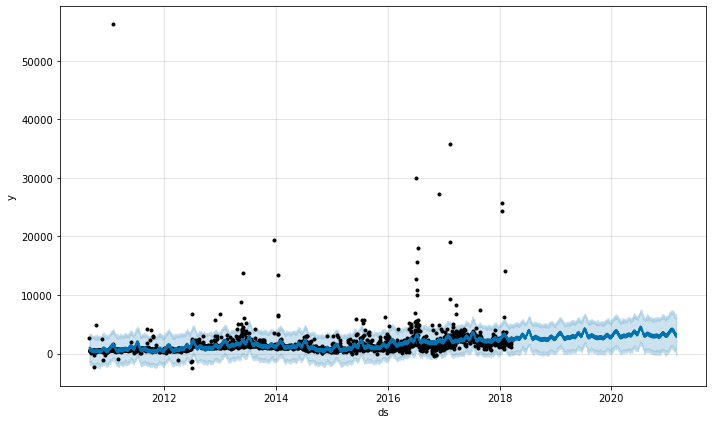

In [100]:
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries
dftrainpredictmodel.plot(forecast)
plt.show()

In [101]:
actual = dftestpredict['y']
pred = forecast['yhat'][:1077]

mape(actual, pred)

297.5768514083816

### RMSE

In [102]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual, pred)
rmse = round(np.sqrt(mse), 2)
rmse

3054.97

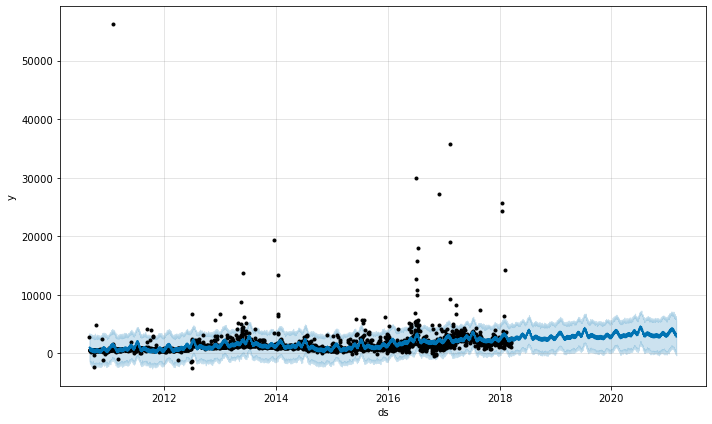

In [109]:
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries
dftrainpredictmodel.plot(forecast)
plt.show()
